# 樣型識別 CH05

fundamentals-of-ml

資工四 B0729003 何妍霖

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 8s 19ms/step - loss: 0.6144 - accuracy: 0.8142 - val_loss: 0.3790 - val_accuracy: 0.8881
Epoch 2/2
375/375 [==============================] - 7s 19ms/step - loss: 0.2552 - accuracy: 0.9204 - val_loss: 0.2088 - val_accuracy: 0.9376
Epoch 1/2
375/375 [==============================] - 8s 21ms/step - loss: 0.2928 - accuracy: 0.9144 - val_loss: 0.1527 - val_accuracy: 0.9542
Epoch 2/2
375/375 [==============================] - 9s 24ms/step - loss: 0.1186 - accuracy: 0.9652 - val_loss: 0.1024 - val_accuracy: 0.9692


**Plotting a validation accuracy comparison**

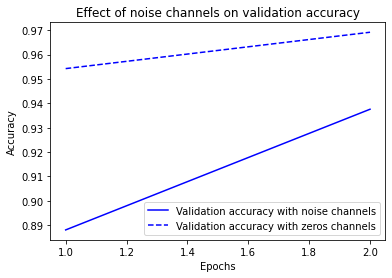

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 13ms/step - loss: 2.3173 - accuracy: 0.1018 - val_loss: 2.3046 - val_accuracy: 0.1060
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 2.3004 - accuracy: 0.1146 - val_loss: 2.3123 - val_accuracy: 0.1020


## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 1143.4618 - accuracy: 0.3172 - val_loss: 2.2770 - val_accuracy: 0.2085
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 4.2563 - accuracy: 0.2483 - val_loss: 2.0466 - val_accuracy: 0.3019


**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 11ms/step - loss: 0.3402 - accuracy: 0.9127 - val_loss: 0.1807 - val_accuracy: 0.9523
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 0.1415 - accuracy: 0.9645 - val_loss: 0.1636 - val_accuracy: 0.9632


### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 3ms/step - loss: 0.6748 - accuracy: 0.8369 - val_loss: 0.3575 - val_accuracy: 0.9056
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.9033 - val_loss: 0.3074 - val_accuracy: 0.9153


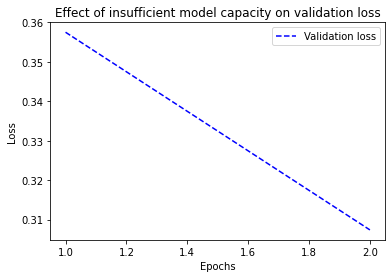

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 6ms/step - loss: 0.3591 - accuracy: 0.8973 - val_loss: 0.1894 - val_accuracy: 0.9443
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 0.1611 - accuracy: 0.9516 - val_loss: 0.1377 - val_accuracy: 0.9585


## Improving generalization

### Dataset curation、Feature engineering、Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/2
30/30 [==============================] - 3s 71ms/step - loss: 0.5472 - accuracy: 0.7784 - val_loss: 0.4256 - val_accuracy: 0.8601
Epoch 2/2
30/30 [==============================] - 3s 84ms/step - loss: 0.3430 - accuracy: 0.8985 - val_loss: 0.3258 - val_accuracy: 0.8835


**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 43ms/step - loss: 0.6407 - accuracy: 0.7531 - val_loss: 0.5813 - val_accuracy: 0.8253
Epoch 2/2
30/30 [==============================] - 1s 36ms/step - loss: 0.5278 - accuracy: 0.8642 - val_loss: 0.4890 - val_accuracy: 0.8571


**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 10s 319ms/step - loss: 0.5402 - accuracy: 0.7721 - val_loss: 0.5618 - val_accuracy: 0.7437
Epoch 2/2
30/30 [==============================] - 10s 328ms/step - loss: 0.2508 - accuracy: 0.8987 - val_loss: 0.4149 - val_accuracy: 0.8298


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 47ms/step - loss: 0.5985 - accuracy: 0.7887 - val_loss: 0.4719 - val_accuracy: 0.8744
Epoch 2/2
30/30 [==============================] - 1s 36ms/step - loss: 0.4072 - accuracy: 0.8975 - val_loss: 0.3922 - val_accuracy: 0.8848


**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 50ms/step - loss: 0.6594 - accuracy: 0.5958 - val_loss: 0.5986 - val_accuracy: 0.7737
Epoch 2/2
30/30 [==============================] - 1s 37ms/step - loss: 0.5793 - accuracy: 0.7467 - val_loss: 0.5244 - val_accuracy: 0.8522
